In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


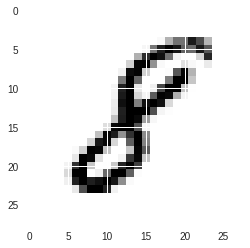

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#selecting a random image from the dataset
image_index = 7777 

# print the label
print(y_train[image_index])

#show the image
plt.imshow(x_train[image_index], cmap='Greys') 

In [34]:
#show the shape of the data set
x_train.shape

(60000, 28, 28)

In [35]:
# flatten 28*28 images to a 784 vector for each image
# reshaping the data so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
#x_train and x_test parts contain greyscale RGB codes (from 0 to 255) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, AveragePooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), input_shape=(28,28,1), padding='same'))
model.add(Activation('tanh'))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1)))
model.add(Activation('tanh'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1)))
model.add(Activation('tanh'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84))
model.add(Activation('tanh'))

#Output Layer with softmax activation
model.add(Dense(10,activation=tf.nn.softmax))

In [37]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

hist = model.fit(x=x_train,y=y_train, batch_size=512, epochs=10,validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.5813 - acc: 0.8414 - val_loss: 0.2601 - val_acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2192 - acc: 0.9338 - val_loss: 0.1663 - val_acc: 0.9518
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1524 - acc: 0.9541 - val_loss: 0.1288 - val_acc: 0.9602
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1146 - acc: 0.9658 - val_loss: 0.0988 - val_acc: 0.9700
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0912 - acc: 0.9728 - val_loss: 0.0812 - val_acc: 0.9756
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0764 - acc: 0.9771 - val_loss: 0.0705 - val_acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0644 - acc: 0.9808 - val_loss: 0.0634 - val_acc

In [38]:
scores = model.evaluate(x_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 67us/step
CNN Error: 1.72%


In [40]:
 # list all data in history
    print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


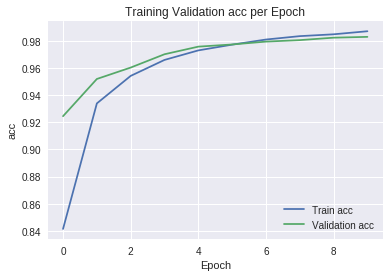

In [62]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'lower right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()

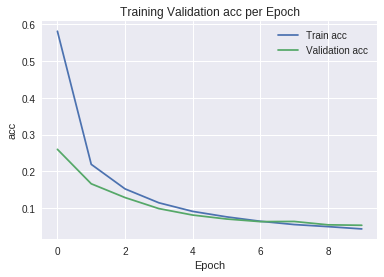

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'upper right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()